In [1]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np
    import networkx as nx
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [2]:
import networkx as nx 
 
G = nx.les_miserables_graph() 

In [3]:
df = nx.to_pandas_edgelist(G)[['source', 'target']] 

G = nx.from_pandas_edgelist(df) 

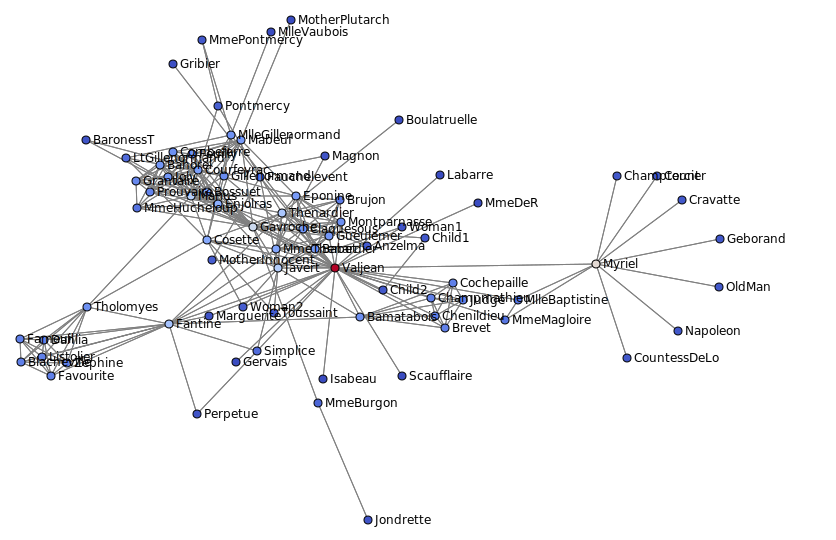

In [4]:
draw_graph(G, font_size=12, show_names=True, node_size=4, edge_width=1) 

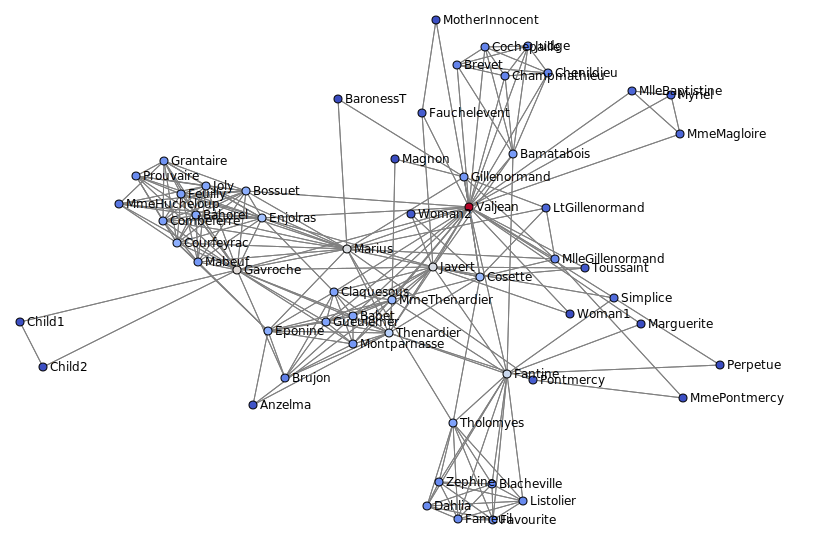

In [5]:
draw_graph(nx.k_core(G, 2), font_size=12, show_names=True, node_size=4, edge_width=1) 

In [6]:
import pandas as pd 
 
pagerank = nx.pagerank(G) 
pagerank_df = pd.DataFrame(pagerank, index=[0]).T 
pagerank_df.columns = ['pagerank'] 
pagerank_df.sort_values('pagerank', inplace=True, ascending=False) 
pagerank_df.head(20) 

,pagerank
Valjean,0.075434
Myriel,0.042803
Gavroche,0.035764
Marius,0.030893
Javert,0.030303
Thenardier,0.027926
Fantine,0.027022
Enjolras,0.021880
Cosette,0.020611
MmeThenardier,0.019501


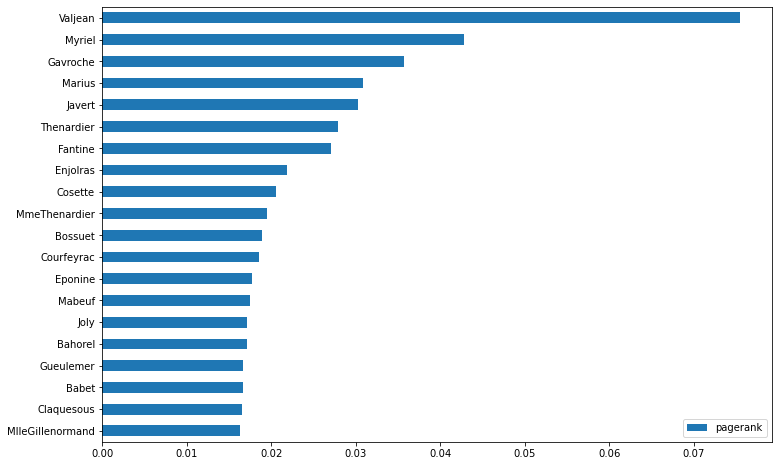

In [7]:
pagerank_df.head(20).plot.barh(figsize=(12,8)).invert_yaxis() 

In [8]:
ego_1 = nx.ego_graph(G, 'Valjean') 

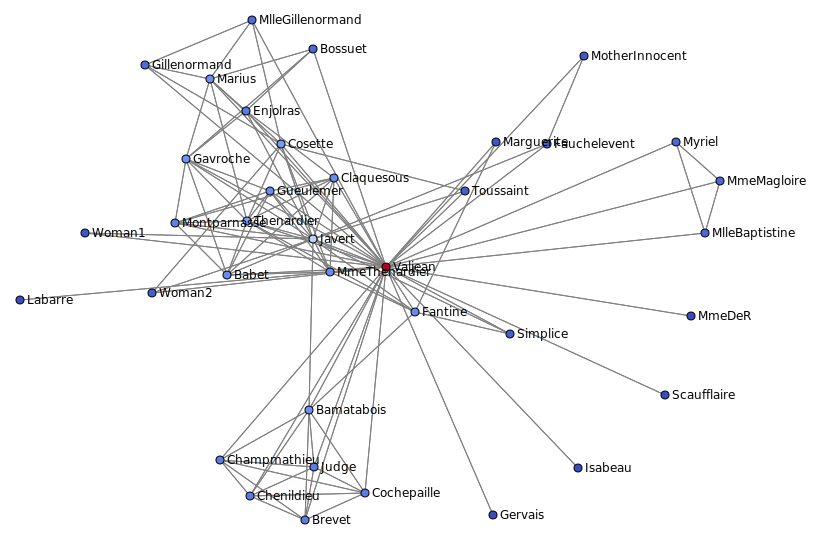

In [9]:
draw_graph(ego_1, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [10]:
ego_1 = nx.ego_graph(G, 'Valjean', center=False) 

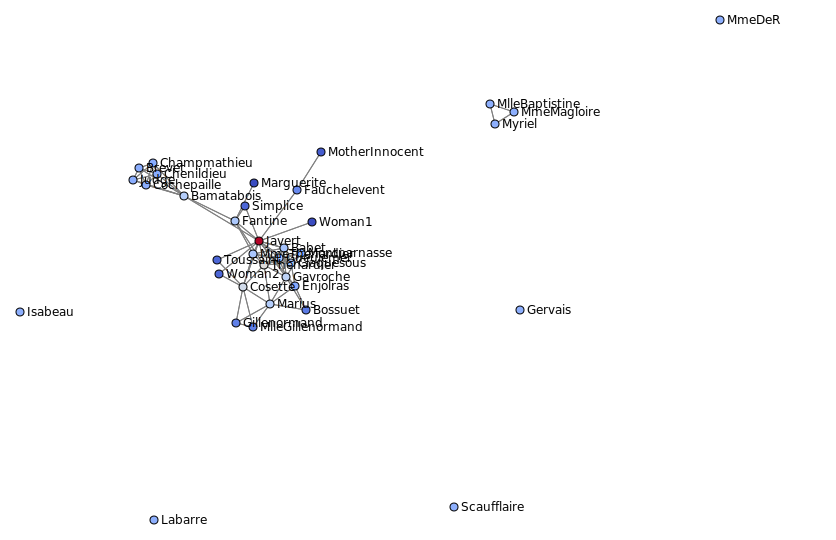

In [11]:
draw_graph(ego_1, font_size=12, show_names=True, node_size=4, edge_width=1) 

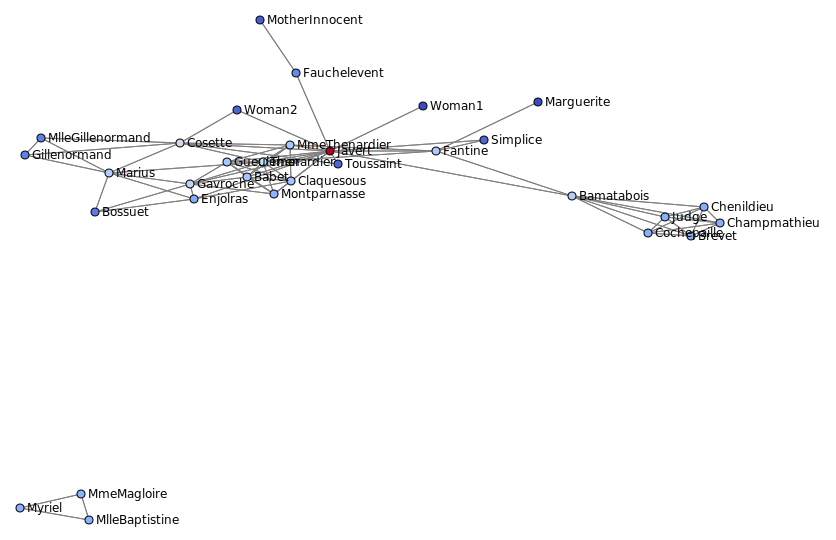

In [12]:
draw_graph(nx.k_core(ego_1, 1), font_size=12, show_names=True, node_size=4, edge_width=1) 

In [13]:
sorted(ego_1.nodes) 

['Babet',
 'Bamatabois',
 'Bossuet',
 'Brevet',
 'Champmathieu',
 'Chenildieu',
 'Claquesous',
 'Cochepaille',
 'Cosette',
 'Enjolras',
 'Fantine',
 'Fauchelevent',
 'Gavroche',
 'Gervais',
 'Gillenormand',
 'Gueulemer',
 'Isabeau',
 'Javert',
 'Judge',
 'Labarre',
 'Marguerite',
 'Marius',
 'MlleBaptistine',
 'MlleGillenormand',
 'MmeDeR',
 'MmeMagloire',
 'MmeThenardier',
 'Montparnasse',
 'MotherInnocent',
 'Myriel',
 'Scaufflaire',
 'Simplice',
 'Thenardier',
 'Toussaint',
 'Woman1',
 'Woman2']

In [14]:
len(ego_1.nodes) 

36

In [15]:
nx.info(ego_1) 

'Graph with 36 nodes and 76 edges'

In [16]:
degcent = nx.degree_centrality(ego_1) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Javert,0.457143
Thenardier,0.285714
Cosette,0.228571
Gavroche,0.228571
MmeThenardier,0.200000
Claquesous,0.200000
Bamatabois,0.200000
Gueulemer,0.200000
Babet,0.200000
Marius,0.200000


In [17]:
nx.density(ego_1) 

0.12063492063492064

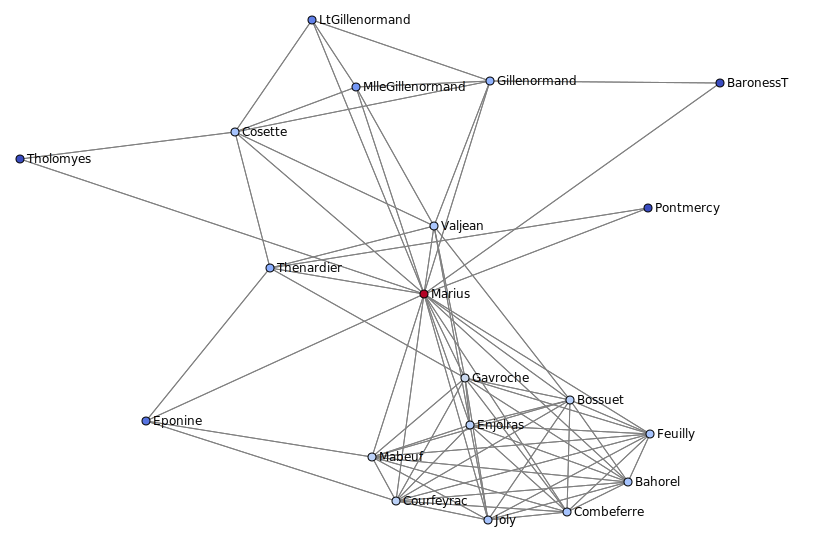

In [18]:
ego_2 = nx.ego_graph(G, 'Marius') 

draw_graph(ego_2, font_size=12, show_names=True, node_size=4, edge_width=1) 

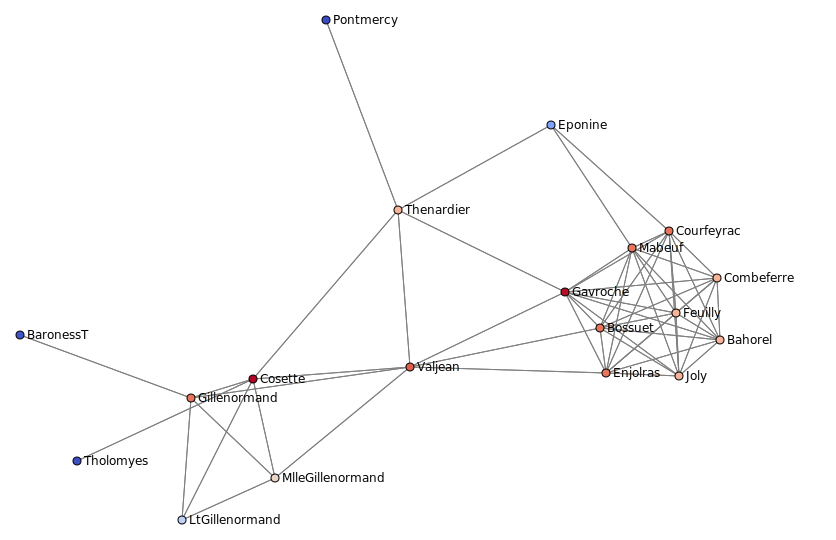

In [19]:
ego_2 = nx.ego_graph(G, 'Marius', center=False) 

draw_graph(ego_2, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [20]:
sorted(ego_2.nodes) 

['Bahorel',
 'BaronessT',
 'Bossuet',
 'Combeferre',
 'Cosette',
 'Courfeyrac',
 'Enjolras',
 'Eponine',
 'Feuilly',
 'Gavroche',
 'Gillenormand',
 'Joly',
 'LtGillenormand',
 'Mabeuf',
 'MlleGillenormand',
 'Pontmercy',
 'Thenardier',
 'Tholomyes',
 'Valjean']

In [21]:
nx.info(ego_2) 

'Graph with 19 nodes and 57 edges'

In [22]:
degcent = nx.degree_centrality(ego_2) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Gavroche,0.555556
Courfeyrac,0.500000
Mabeuf,0.500000
Bossuet,0.500000
Enjolras,0.500000
Bahorel,0.444444
Feuilly,0.444444
Combeferre,0.444444
Joly,0.444444
Valjean,0.388889


In [23]:
nx.density(ego_2) 

0.3333333333333333

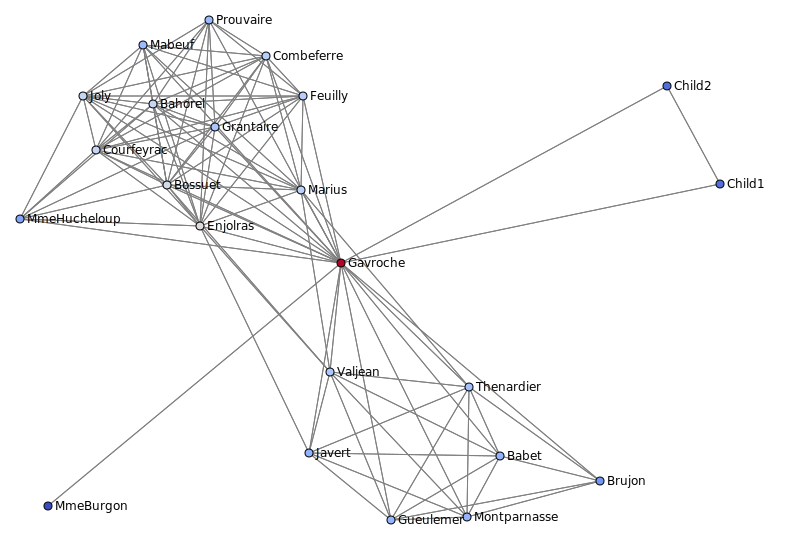

In [24]:
ego_3 = nx.ego_graph(G, 'Gavroche') 

draw_graph(ego_3, font_size=12, show_names=True, node_size=4, edge_width=1) 

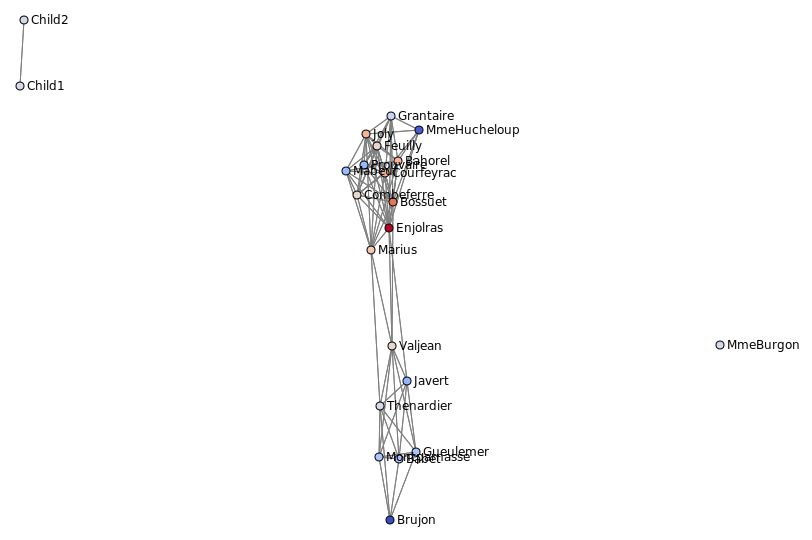

In [25]:
ego_3 = nx.ego_graph(G, 'Gavroche', center=False) 

draw_graph(ego_3, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [26]:
sorted(ego_3.nodes) 

['Babet',
 'Bahorel',
 'Bossuet',
 'Brujon',
 'Child1',
 'Child2',
 'Combeferre',
 'Courfeyrac',
 'Enjolras',
 'Feuilly',
 'Grantaire',
 'Gueulemer',
 'Javert',
 'Joly',
 'Mabeuf',
 'Marius',
 'MmeBurgon',
 'MmeHucheloup',
 'Montparnasse',
 'Prouvaire',
 'Thenardier',
 'Valjean']

In [27]:
nx.info(ego_3) 

'Graph with 22 nodes and 82 edges'

In [28]:
degcent = nx.degree_centrality(ego_3) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Enjolras,0.619048
Bossuet,0.571429
Bahorel,0.523810
Courfeyrac,0.523810
Joly,0.523810
Marius,0.476190
Feuilly,0.476190
Combeferre,0.476190
Grantaire,0.428571
Valjean,0.380952


In [29]:
nx.density(ego_3) 

0.354978354978355

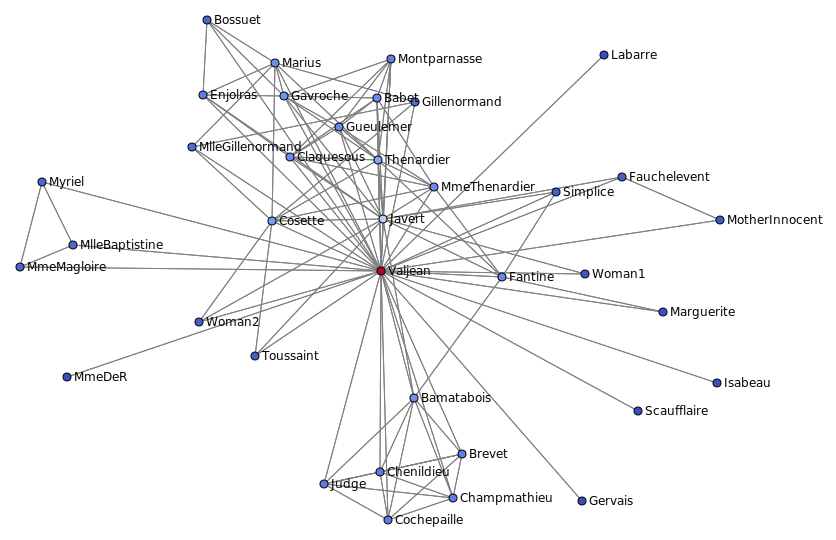

In [30]:
ego_4 = nx.ego_graph(G, 'Valjean') 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

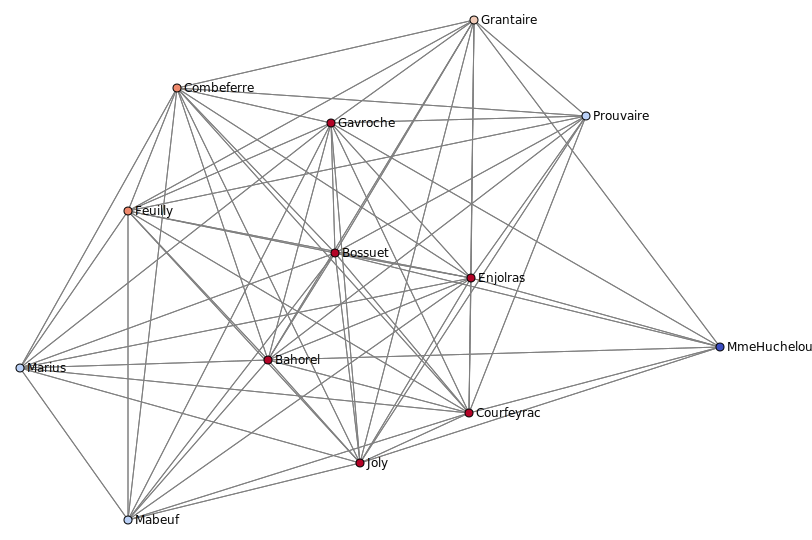

In [31]:
ego_4 = nx.ego_graph(G, 'Joly') 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

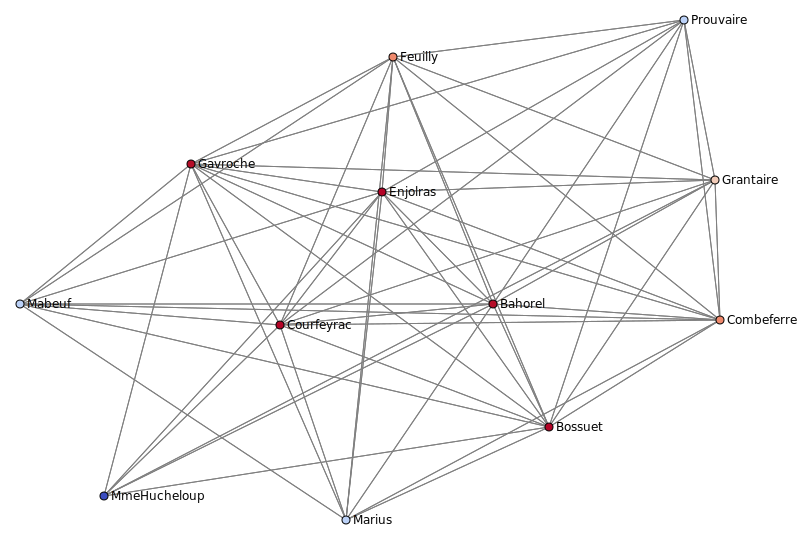

In [32]:
ego_4 = nx.ego_graph(G, 'Joly', center=False) 

draw_graph(ego_4, font_size=12, show_names=True, node_size=4, edge_width=1) 

In [33]:
sorted(ego_4.nodes) 

['Bahorel',
 'Bossuet',
 'Combeferre',
 'Courfeyrac',
 'Enjolras',
 'Feuilly',
 'Gavroche',
 'Grantaire',
 'Mabeuf',
 'Marius',
 'MmeHucheloup',
 'Prouvaire']

In [34]:
nx.info(ego_4) 

'Graph with 12 nodes and 57 edges'

In [35]:
degcent = nx.degree_centrality(ego_4) 
degcent_df = pd.DataFrame(degcent, index=[0]).T 
degcent_df.columns = ['degree_centrality'] 
degcent_df.sort_values( 'degree_centrality', inplace=True, ascending=False) 
degcent_df.head(10) 

,degree_centrality
Bahorel,1.000000
Gavroche,1.000000
Courfeyrac,1.000000
Bossuet,1.000000
Enjolras,1.000000
Combeferre,0.909091
Feuilly,0.909091
Grantaire,0.818182
Prouvaire,0.727273
Marius,0.727273


In [36]:
nx.density(ego_4) 

0.8636363636363636